In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from Net import Net
from utils import train, test, plt_graph

In [2]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           2,304
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5            [-1, 8, 24, 24]             128
            Conv2d-6            [-1, 8, 24, 24]             576
              ReLU-7            [-1, 8, 24, 24]               0
         MaxPool2d-8            [-1, 8, 12, 12]               0
            Conv2d-9           [-1, 16, 10, 10]           1,152
             ReLU-10           [-1, 16, 10, 10]               0
           Conv2d-11             [-1, 16, 8, 8]           2,304
             ReLU-12             [-1, 16, 8, 8]               0
           Conv2d-13              [-1, 8, 8, 8]             128
        MaxPool2d-14              [-1, 

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 20):
    train_acc,train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
    test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)

Train: Loss=2.3024 Batch_id=468 Accuracy=13.24: 100%|██████████| 469/469 [00:22<00:00, 21.29it/s]


Test set: Average loss: 0.0182, Accuracy: 1454/10000 (14.54%)

0.01 2


Train: Loss=2.3023 Batch_id=468 Accuracy=16.25: 100%|██████████| 469/469 [00:20<00:00, 22.93it/s]


Test set: Average loss: 0.0182, Accuracy: 1729/10000 (17.29%)

0.01 3


Train: Loss=2.2992 Batch_id=468 Accuracy=14.44: 100%|██████████| 469/469 [00:19<00:00, 23.70it/s]


Test set: Average loss: 0.0181, Accuracy: 975/10000 (9.75%)

0.01 4


Train: Loss=0.2070 Batch_id=468 Accuracy=66.94: 100%|██████████| 469/469 [00:20<00:00, 22.59it/s]


Test set: Average loss: 0.0016, Accuracy: 9408/10000 (94.08%)

0.01 5


Train: Loss=0.0564 Batch_id=468 Accuracy=94.22: 100%|██████████| 469/469 [00:18<00:00, 24.90it/s]


Test set: Average loss: 0.0010, Accuracy: 9607/10000 (96.07%)

0.01 6


Train: Loss=0.1463 Batch_id=468 Accuracy=95.73: 100%|██████████| 469/469 [00:19<00:00, 24.04it/s]


Test set: Average loss: 0.0008, Accuracy: 9667/10000 (96.67%)

0.01 7


Train: Loss=0.1214 Batch_id=468 Accuracy=96.74: 100%|██████████| 469/469 [00:19<00:00, 23.61it/s]


Test set: Average loss: 0.0008, Accuracy: 9711/10000 (97.11%)

0.01 8


Train: Loss=0.0742 Batch_id=468 Accuracy=97.14: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]


Test set: Average loss: 0.0006, Accuracy: 9744/10000 (97.44%)

0.01 9


Train: Loss=0.0272 Batch_id=468 Accuracy=97.52: 100%|██████████| 469/469 [00:18<00:00, 24.73it/s]


Test set: Average loss: 0.0006, Accuracy: 9751/10000 (97.51%)

0.01 10


Train: Loss=0.0250 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:19<00:00, 24.38it/s]


Test set: Average loss: 0.0005, Accuracy: 9768/10000 (97.68%)

0.01 11


Train: Loss=0.0871 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:19<00:00, 23.64it/s]


Test set: Average loss: 0.0005, Accuracy: 9784/10000 (97.84%)

0.01 12


Train: Loss=0.1170 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:19<00:00, 23.97it/s]


Test set: Average loss: 0.0005, Accuracy: 9805/10000 (98.05%)

0.01 13


Train: Loss=0.1617 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:18<00:00, 24.89it/s]


Test set: Average loss: 0.0005, Accuracy: 9804/10000 (98.04%)

0.01 14


Train: Loss=0.0353 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:18<00:00, 24.77it/s]


Test set: Average loss: 0.0004, Accuracy: 9820/10000 (98.20%)

0.01 15


Train: Loss=0.0512 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:19<00:00, 24.39it/s]


Test set: Average loss: 0.0004, Accuracy: 9820/10000 (98.20%)

0.01 16


Train: Loss=0.0584 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:19<00:00, 24.60it/s]


Test set: Average loss: 0.0004, Accuracy: 9837/10000 (98.37%)

0.01 17


Train: Loss=0.0292 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:18<00:00, 25.13it/s]


Test set: Average loss: 0.0004, Accuracy: 9839/10000 (98.39%)

0.01 18


Train: Loss=0.1407 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:19<00:00, 24.47it/s]


Test set: Average loss: 0.0004, Accuracy: 9843/10000 (98.43%)

0.01 19


Train: Loss=0.0269 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:20<00:00, 23.44it/s]


Test set: Average loss: 0.0004, Accuracy: 9828/10000 (98.28%)

0.01 20


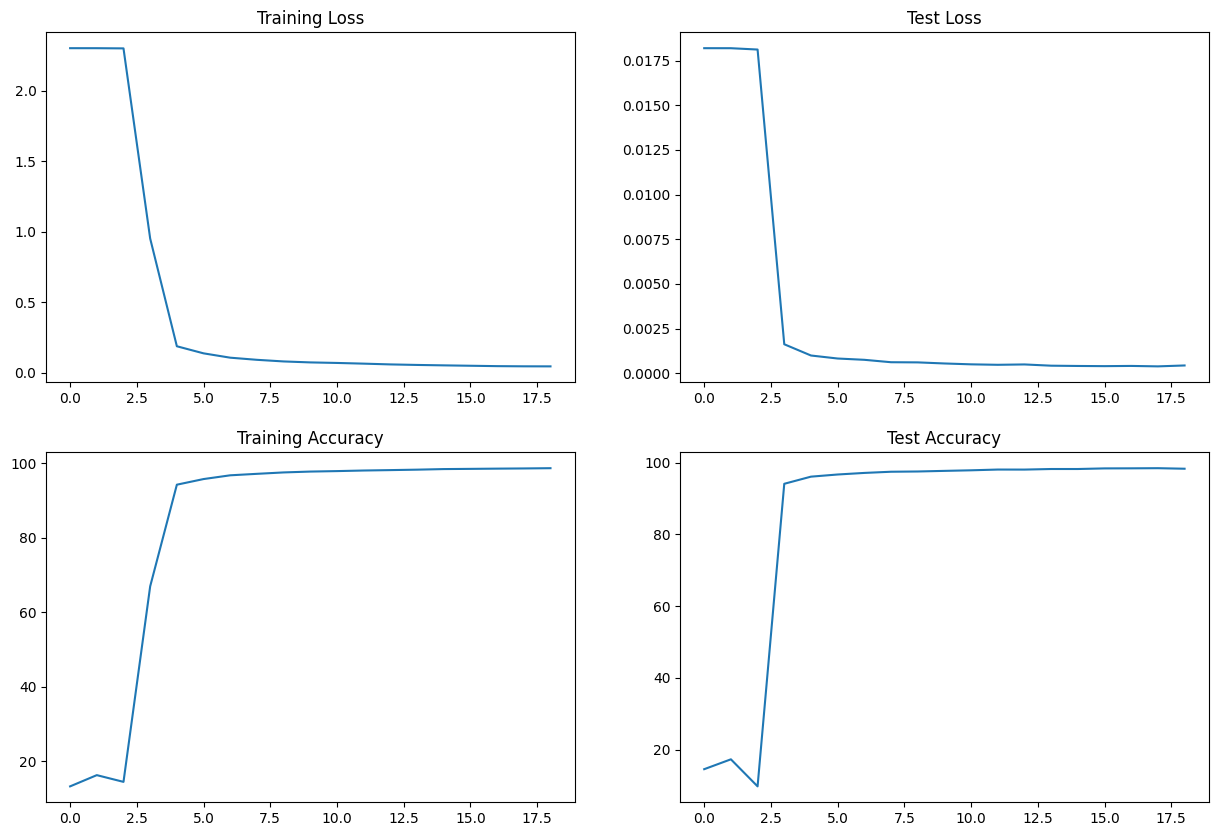

In [5]:
plt_graph(train_losses,test_losses,train_acc,test_acc)